# **"Tangan Hijau, Teknologi Cerdas: Mengaplikasikan Machine Learning untuk Pertumbuhan dan Nutrisi Tanaman yang Lebih Efisien"**

> **NURRAHMAWATI**

> Talent Fair Challenge: Aria Dataset

Linkedin: https://www.linkedin.com/in/nurrahmawatii/<br>
Github: http://github.com/nurrahmawatii<br>
Gmail: nurrahmawati682@gmail.com<br>
Phone: +6289647118538

## **I. PENDAHULUAN**

Data ini berisi informasi mengenai variabel yang dapat digunakan untuk memprediksi nutrisi tanaman. Variabel ini termasuk variabel V1-V8, yang mengandung informasi terkait nutrisi tanaman, serta variabel sample_type, yang mengandung informasi tentang jenis sampel dan laboratorium tempat sampel diperoleh.

Proyek ini bertujuan untuk meningkatkan efisiensi dalam pertumbuhan dan nutrisi tanaman dengan menerapkan teknologi cerdas. Data yang digunakan meliputi informasi tentang nutrisi tanaman dan jenis sampel yang berbeda. Dalam proyek ini, machine learning akan digunakan untuk membuat model prediksi yang dapat memprediksi nutrisi tanaman berdasarkan variabel yang relevan.

Pada tahap analisis, kita akan menganalisis perbedaan pengaruh jenis sampel yang berbeda terhadap kualitas tanaman, sehingga kita dapat menentukan apakah jenis sampel mempengaruhi pertumbuhan dan nutrisi tanaman secara signifikan.

Dalam proyek ini, teknologi cerdas (represented by the term "tangan hijau, teknologi cerdas") dan machine learning digunakan untuk memperbaiki pertumbuhan dan nutrisi tanaman dengan cara yang lebih efisien. Diharapkan bahwa proyek ini dapat memberikan manfaat bagi para petani untuk meningkatkan produksi pertanian mereka dan juga bagi lingkungan dengan mengurangi penggunaan pupuk yang tidak perlu.

## **II. IMPORT PUSTAKA DAN MEMUAT DATA**

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

Tahap awal yang harus saya lakukan adalah memuat data yang diperoleh dari Google Drive ke dalam notebook saya, sehingga saya tidak perlu lagi mengunggah data secara manual ke dalam notebook.

In [3]:
# Connecting google colab runtime with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
data_ori = pd.read_excel('/content/drive/MyDrive/Talent_Fair_HCK/aria_data.xlsx')

In [5]:
data_ori.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [6]:
data_ori.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [7]:
data = data_ori.copy()

### 2.1 ANALISIS KUALITAS DATA

Analisis kualitas data adalah proses untuk memeriksa dan mengevaluasi kualitas data untuk memastikan bahwa data yang digunakan untuk analisis atau pemodelan adalah akurat, konsisten, lengkap, dan relevan. Dalam analisis kualitas data, kita mencari tahu apakah terdapat data yang hilang, data yang tidak konsisten, atau data yang duplikat.

In [8]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Berdasarkan dari informasi di atas, diketahui bahwa data ini terdiri dari 160 entri data dan terdiri dari total 10 kolom. Kolom tersebut memiliki tipe data float64 dan object. Selain itu, terlihat bahwa tidak terdapat nilai yang kosong dari setiap kolom berdasarkan data yang tersedia. Meskipun demikian, sebaiknya kita melakukan pemeriksaan lebih lanjut untuk memastikan ketiadaan nilai yang kosong pada data tersebut. Dengan melakukan pemeriksaan ini, kita dapat memastikan bahwa data yang digunakan untuk analisis lebih akurat dan valid.

In [9]:
# Check Percentage Missing Values
data.isnull().mean().sort_values()

target         0.0
v1             0.0
v2             0.0
v3             0.0
v4             0.0
v5             0.0
v6             0.0
v7             0.0
v8             0.0
sample_type    0.0
dtype: float64

Setelah dilakukan pemeriksaan lebih lanjut, dapat disimpulkan bahwa memang tidak terdapat nilai yang kosong pada data ini. Oleh karena itu, tidak diperlukan adanya penanganan terhadap nilai yang kosong tersebut. Hasil ini memberikan kepastian bahwa data yang digunakan untuk analisis selanjutnya dapat dianggap akurat dan valid. Dengan demikian, data ini dapat dilanjutkan ke tahap analisis berikutnya tanpa harus mengkhawatirkan adanya nilai kosong yang dapat mempengaruhi hasil analisis.

In [10]:
# Checking data duplicated
duplicates = data.duplicated().sum()
print('Duplicates:', duplicates)

Duplicates: 0


Selain melakukan pemeriksaan terhadap nilai yang kosong pada data, kita juga melakukan pemeriksaan terhadap kemungkinan adanya nilai duplikat pada data. Dari hasil pemeriksaan, dapat disimpulkan bahwa tidak terdapat nilai duplikat pada data yang kita gunakan. Hal ini menunjukkan bahwa data tersebut bersifat unik dan berbeda satu sama lain. Dengan memastikan ketiadaan nilai duplikat pada data, kita dapat memastikan bahwa analisis yang dilakukan nantinya tidak terpengaruh oleh nilai duplikat yang tidak seharusnya ada dalam data tersebut. Dengan demikian, data yang digunakan untuk analisis selanjutnya dapat dianggap valid dan dapat diandalkan.

Selanjutnya, kita memeriksa apakah ada data yang tidak konsisten dalam setiap kolom dengan menghitung standar deviasi dari setiap kolom menggunakan fungsi apply() dan std(). Data yang tidak konsisten bisa menjadi indikasi adanya kesalahan dalam pengambilan data atau pengukuran.

In [11]:
# Check for inconsistent data
inconsistent_data = data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']].apply(lambda x: x.std(), axis=0)
print('Inconsistent Data:\n', inconsistent_data)

Inconsistent Data:
 v1    148.673511
v2     70.128690
v3    118.798984
v4     63.060442
v5    100.941711
v6     59.634652
v7     51.148098
v8    335.035933
dtype: float64


Dari hasil pemeriksaan yang dilakukan, ditemukan adanya inconsisten data pada kolom V1 hingga V8. Hal ini ditunjukkan oleh nilai yang sangat tinggi pada kolom V8, yaitu 335.035933. Nilai ini jauh lebih besar dibandingkan dengan nilai rata-rata kolom lainnya. Ketidaksesuaian ini dapat menyebabkan bias dalam analisis yang dilakukan karena adanya outlier yang mempengaruhi hasil keseluruhan. Oleh karena itu, sebaiknya kita melakukan pemeriksaan lebih lanjut apakah terdapat outlier atau tidak pada data tersebut.

Selanjutnya, untuk memastikan validitas analisis antara kedua sampel, perlu dilakukan pemeriksaan terhadap proporsi dari masing-masing sampel. Jika ditemukan bahwa proporsi kedua sampel tidak sama, maka perlu dilakukan penanganan terhadap kondisi imbalance tersebut sebelum dilakukan proses pemodelan machine learning. Hal ini dilakukan agar hasil analisis yang dihasilkan dapat lebih akurat dan dapat diandalkan dalam mengambil keputusan terkait pertumbuhan tanaman.

In [12]:
data['sample_type'].value_counts()

lab 1    100
lab 2     60
Name: sample_type, dtype: int64

Berdasarkan hasil dari pemeriksaan di atas bahwa proporsi dari masing-masing sampel tidak seimbang, hal ini dapat memengaruhi kualitas model machine learning yang akan dibangun. Untuk menangani ketidakseimbangan tersebut, dapat dilakukan teknik oversampling, yaitu menambahkan jumlah sampel pada sampel yang kurang hingga proporsi keduanya seimbang. Salah satu teknik oversampling yang umum digunakan adalah Synthetic Minority Oversampling Technique (SMOTE).

In [13]:
# Pisahkan fitur dan label
X = data.drop('sample_type', axis=1)
y = data['sample_type']

# Inisialisasi SMOTE
sm = SMOTE(random_state=42)

# Resampling data
X_res, y_res = sm.fit_resample(X, y)

resampled = pd.concat([X_res.reset_index(drop=True), y_res.reset_index(drop=True)], axis=1)
resampled

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.630000,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.000000,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.910000,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.770000,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.890000,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
195,4.218976,619.318509,353.810957,657.262521,485.738945,663.307400,358.614780,741.004126,3792.668436,lab 2
196,4.657930,622.067319,364.733621,648.288494,489.022541,686.819854,360.252034,731.167289,3765.254433,lab 2
197,4.922394,516.006349,189.623157,572.997956,355.775219,462.248412,192.858042,633.280768,4710.273645,lab 2
198,5.033977,523.898038,209.434701,586.598142,374.577851,476.892452,217.456439,606.285223,4450.582933,lab 2


In [14]:
resampled['sample_type'].value_counts()

lab 1    100
lab 2    100
Name: sample_type, dtype: int64

Hasil dari penerapan SMOTE adalah menghasilkan jumlah sampel yang sama antara kedua jenis sampel, yaitu 100 sampel untuk masing-masing jenis sampel. Hal ini dapat meminimalkan kemungkinan terjadinya overfitting pada model machine learning yang dibangun, serta memastikan bahwa model memiliki kemampuan yang seimbang dalam memprediksi target pada kedua jenis sampel. Dalam hal ini, variabel-variabel yang signifikan terhadap target pada kedua jenis sampel dapat dibandingkan dengan lebih akurat, karena tidak dipengaruhi oleh perbedaan jumlah sampel yang signifikan antara keduanya.

### 2.2 IDENTIFIKASI FAKTOR-FAKTOR

Identifikasi faktor-faktor yang memengaruhi ketersediaan nutrisi pada tanaman adalah proses analisis untuk menemukan hubungan antara variabel input atau faktor-faktor tertentu dengan ketersediaan nutrisi pada tanaman. Kita memeriksa hubungan antara variabel input atau faktor-faktor dengan ketersediaan nutrisi pada tanaman dengan menggunakan regresi linier.

Dalam melakukan analisis regresi, terdapat beberapa asumsi yang harus dipenuhi agar hasil analisis regresi dapat diandalkan. Beberapa asumsi tersebut antara lain normalitas data, homoskedastisitas, dan tidak adanya multikolinearitas antara variabel independent. Oleh karena itu, sebaiknya dilakukan juga uji asumsi regresi sebelum melakukan analisis regresi.

#### 2.2.1 NORMALITAS DATA

Untuk memeriksa normalitas data, kita akan menggunakan uji statistik seperti uji Shapiro-Wilk.

Shapiro-Wilk test adalah salah satu tes statistik yang dapat digunakan untuk menguji normalitas data. Hasil dari tes ini dapat dijelaskan sebagai berikut:

- H0: Data diuji berasal dari distribusi normal.
- H1: Data diuji tidak berasal dari distribusi normal.

Jika nilai p (p-value) dari Shapiro-Wilk test lebih besar dari tingkat signifikansi yang telah ditentukan, maka hipotesis nol diterima, dan data dianggap berasal dari distribusi normal. Sebaliknya, jika nilai p lebih kecil dari tingkat signifikansi, maka hipotesis alternatif diterima, dan data dianggap tidak berasal dari distribusi normal.

Umumnya, jika nilai p kurang dari 0,05 (tingkat signifikansi 5%), maka dapat dianggap bahwa data tidak berdistribusi normal. Namun, hasil dari Shapiro-Wilk test juga harus dilihat bersamaan dengan plot distribusi data, seperti histogram atau plot density, serta plot qq-plot, untuk memastikan apakah data benar-benar berdistribusi normal atau tidak.

QQ-plot (Quantile-Quantile plot) adalah grafik yang menunjukkan plot antara kuantil dari distribusi data dengan kuantil dari distribusi normal. Jika data normal, maka plot akan mengikuti garis diagonal. Sementara jika data tidak normal, plot akan memiliki pola yang berbeda.

Shapiro-Wilk test result: ShapiroResult(statistic=0.9901894330978394, pvalue=0.19040997326374054)


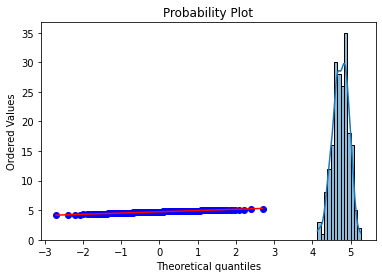

In [15]:
# Plot histogram
sns.histplot(resampled['target'], kde=True)

# Plot normal probability plot
stats.probplot(resampled['target'], dist="norm", plot=plt)

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(resampled['target'])
print("Shapiro-Wilk test result:", shapiro_test)

Berdasarkan dari Grafik histogram di atas menunjukkan bahwa data memiliki pola yang simetris dan berbentuk kurva lonceng. Sementara itu, pada grafik QQ-plot, plot data mengikuti garis diagonal, menunjukkan bahwa data berdistribusi normal.

#### 2.2.2 HOMOSKEDASTISITAS

Homoskedastisitas adalah asumsi dalam analisis regresi yang menyatakan bahwa variansi residual (selisih antara nilai sebenarnya dan nilai yang diprediksi) dari model regresi harus sama konstan (homogen) di seluruh rentang nilai dari variabel independen. Dalam kondisi homoskedastisitas, sebaran nilai residual seharusnya merata di sepanjang rentang nilai variabel independen, sehingga tidak terlihat pola tertentu dalam plot residual.

Untuk memeriksa homoskedastisitas, kita akan menggunakan scatter plot. Jika pola yang dihasilkan menunjukkan pola funnel atau diamond, maka homoskedastisitas tidak terpenuhi. Jika pola yang dihasilkan menyebar merata dengan variansi yang relatif konstan, maka homoskedastisitas terpenuhi.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


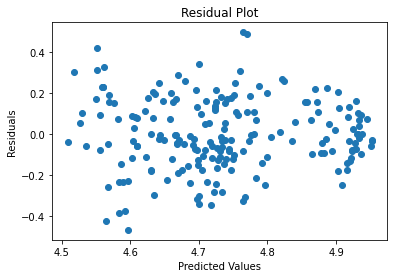

In [16]:
# define dependent and independent variables
y = resampled['target']
X = resampled[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']]

import statsmodels.api as sm_api

# fit linear regression model
model = sm_api.OLS(y, sm_api.add_constant(X)).fit()

# check homoscedasticity
y_pred = model.predict(sm_api.add_constant(X))
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Berdasarkan hasil dari scatter plot di atas, pola yang dihasilkan tidak menunjukkan pola funnel atau diamond dan menyebar merata dengan variansi yang relatif konstan, maka dapat disimpulkan bahwa homoskedastisitas pada data ini terpenuhi

#### 2.2.3 TIDAK ADANYA MULTIKOLINEARITAS

Untuk memeriksa multikolinearitas, kita akan menggunakan uji statistik seperti uji VIF (variance inflation factor).

In [17]:
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variables"] = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
vif["VIF"] = [variance_inflation_factor(resampled[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']].values, i) for i in range(8)]
print(vif)

  variables          VIF
0        v1   643.590540
1        v2   628.336940
2        v3  1277.644392
3        v4  1716.836327
4        v5  1236.773346
5        v6   900.732371
6        v7  1063.833866
7        v8   351.334346


Hasil pemeriksaan multikolinearitas menunjukkan nilai Variance Inflation Factor (VIF) yang cukup tinggi untuk beberapa variabel, yaitu v3, v4, v5, dan v7, dengan nilai VIF masing-masing di atas 1000. Nilai VIF yang tinggi menunjukkan adanya korelasi yang tinggi antara variabel tersebut dengan variabel lain dalam model.

Korelasi yang tinggi antar variabel dapat menyebabkan masalah dalam analisis regresi, di mana hasil estimasi parameter regresi dapat menjadi tidak stabil atau tidak dapat diandalkan. Selain itu, interpretasi hasil analisis regresi juga dapat menjadi sulit karena adanya variasi yang tinggi dalam koefisien regresi.

Untuk mengatasi masalah multikolinearitas, salah satu langkah yang dapat dilakukan yaitu menghapus menghapus variabel yang memiliki nilai VIF yang sangat tinggi.

Dalam hal ini, dapat dipertimbangkan untuk mencoba menghapus variabel v4 dari model karena nilai VIF tertinggi kemudian akan dilakukan pemeriksaan kembali terhadap nilai VIF pada variabel lainnya.

In [18]:
# Drop columns that have highest VIF values
resampled.drop(['v4'], axis = 1, inplace=True)
resampled

,target,v1,v2,v3,v5,v6,v7,v8,sample_type
0,4.630000,260.600000,199.000000,391.333333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.000000,263.200000,194.600000,393.666667,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.910000,247.266667,205.800000,375.466667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.770000,257.944444,191.833333,368.722222,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.890000,258.200000,195.733333,356.666667,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...
195,4.218976,619.318509,353.810957,657.262521,663.307400,358.614780,741.004126,3792.668436,lab 2
196,4.657930,622.067319,364.733621,648.288494,686.819854,360.252034,731.167289,3765.254433,lab 2
197,4.922394,516.006349,189.623157,572.997956,462.248412,192.858042,633.280768,4710.273645,lab 2
198,5.033977,523.898038,209.434701,586.598142,476.892452,217.456439,606.285223,4450.582933,lab 2


In [19]:
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variables"] = ['v1', 'v2', 'v3', 'v5', 'v6', 'v7', 'v8']
vif["VIF"] = [variance_inflation_factor(resampled[['v1', 'v2', 'v3', 'v5', 'v6', 'v7', 'v8']].values, i) for i in range(7)]
print(vif)

  variables          VIF
0        v1   643.325021
1        v2   550.471069
2        v3  1240.363495
3        v5  1230.339571
4        v6   850.946664
5        v7   780.738107
6        v8   351.329683


Setelah dilakukan pemeriksaan ulang dan penghapusan variabel v4, ditemukan bahwa nilai VIF pada v7 sudah tidak terlalu tinggi seperti sebelumnya. Namun, terdapat variabel v3 yang memiliki nilai VIF yang cukup tinggi dibandingkan dengan variabel lainnya. Oleh karena itu, perlu dilakukan seleksi variabel dengan menghapus v3 dan melakukan pengecekan kembali terhadap variabel lainnya.

In [20]:
# Drop columns that have highest VIF values
resampled.drop(['v3'], axis = 1, inplace=True)
resampled

,target,v1,v2,v5,v6,v7,v8,sample_type
0,4.630000,260.600000,199.000000,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.000000,263.200000,194.600000,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.910000,247.266667,205.800000,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.770000,257.944444,191.833333,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.890000,258.200000,195.733333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...
195,4.218976,619.318509,353.810957,663.307400,358.614780,741.004126,3792.668436,lab 2
196,4.657930,622.067319,364.733621,686.819854,360.252034,731.167289,3765.254433,lab 2
197,4.922394,516.006349,189.623157,462.248412,192.858042,633.280768,4710.273645,lab 2
198,5.033977,523.898038,209.434701,476.892452,217.456439,606.285223,4450.582933,lab 2


In [21]:
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variables"] = ['v1', 'v2', 'v5', 'v6', 'v7', 'v8']
vif["VIF"] = [variance_inflation_factor(resampled[['v1', 'v2', 'v5', 'v6', 'v7', 'v8']].values, i) for i in range(6)]
print(vif)

  variables          VIF
0        v1   103.684636
1        v2   514.216536
2        v5  1167.194815
3        v6   841.841247
4        v7   777.877317
5        v8   317.929666


Dapat dilihat bahwa setelah dilakukan pemeriksaan ulang, variabel v5 masih memiliki nilai VIF yang cukup tinggi. Oleh karena itu, kita dapat mempertimbangkan untuk mencoba menghapus variabel v5 tersebut.

In [22]:
# Drop columns that have highest VIF values
resampled.drop(['v5'], axis = 1, inplace=True)
resampled

,target,v1,v2,v6,v7,v8,sample_type
0,4.630000,260.600000,199.000000,273.133333,742.066667,4047.733333,lab 1
1,5.000000,263.200000,194.600000,220.066667,712.000000,4673.466667,lab 1
2,4.910000,247.266667,205.800000,222.133333,677.200000,4386.800000,lab 1
3,4.770000,257.944444,191.833333,195.944444,678.555556,4588.777778,lab 1
4,4.890000,258.200000,195.733333,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...
195,4.218976,619.318509,353.810957,358.614780,741.004126,3792.668436,lab 2
196,4.657930,622.067319,364.733621,360.252034,731.167289,3765.254433,lab 2
197,4.922394,516.006349,189.623157,192.858042,633.280768,4710.273645,lab 2
198,5.033977,523.898038,209.434701,217.456439,606.285223,4450.582933,lab 2


In [23]:
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["variables"] = ['v1', 'v2', 'v6', 'v7', 'v8']
vif["VIF"] = [variance_inflation_factor(resampled[['v1', 'v2', 'v6', 'v7', 'v8']].values, i) for i in range(5)]
print(vif)

  variables         VIF
0        v1   29.804443
1        v2  445.354470
2        v6  762.131573
3        v7  711.129208
4        v8  317.604175


Berdasarkan hasil pemeriksaan ulang yang dilakukan, terlihat bahwa nilai VIF pada beberapa variabel telah menurun dan menjadi lebih rendah dibandingkan sebelumnya. Setelah dipertimbangkan, nilai VIF pada semua variabel di atas sudah berada pada tingkat yang dapat diterima, maka tidak perlu lagi dilakukan penghapusan variabel.

#### 2.2.4 ANALISIS REGRESI


Kita menggunakan formula smf.ols() dari paket statsmodels untuk membangun model regresi linier. Dalam formula regresi linier, Target adalah variabel dependent atau target yang ingin kita prediksi, V1, V2, V6, dan V8 adalah variabel independent atau faktor-faktor yang memengaruhi ketersediaan nutrisi pada tanaman, dan Sample_Type adalah variabel kategorikal yang mewakili dua jenis sampel yang diperoleh dari dua laboratorium yang berbeda.

In [24]:
# Fit a linear regression model
model = smf.ols('target ~ v1 + v2 + v6 + v7 + v8 + sample_type', data=resampled).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     14.44
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.38e-13
Time:                        00:17:20   Log-Likelihood:                 65.985
No. Observations:                 200   AIC:                            -118.0
Df Residuals:                     193   BIC:                            -94.88
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.8915 

Hasil yang diberikan merupakan output dari regresi linear berganda (multiple linear regression) dengan menggunakan Ordinary Least Squares (OLS) sebagai metode estimasi. Model regresi ini mencoba untuk menjelaskan variasi pada variabel target (dependent variable) dengan menggunakan beberapa variabel prediktor (independent variable) yang tercantum dalam tabel.

Beberapa informasi yang dapat diambil dari hasil regresi ini antara lain:


*   R-squared (R2) atau koefisien determinasi sebesar 0.310. R2 adalah ukuran seberapa baik variabel independen dapat menjelaskan variasi pada variabel dependen. Semakin tinggi nilai R2, semakin baik variabel independen dalam menjelaskan variasi pada variabel dependen. Nilai R2 sebesar 0.310 menunjukkan bahwa variabel independen yang digunakan dalam model hanya dapat menjelaskan sekitar 31.0% variasi pada variabel dependen, sehingga masih ada sekitar 69.0% variasi lain yang belum dijelaskan oleh variabel independen.

*   Adj.R-squared (Adjusted R2) sebesar 0.288. Nilai ini adalah R2 yang disesuaikan untuk jumlah variabel independen yang digunakan dalam model. Semakin banyak variabel independen yang digunakan dalam model, semakin tinggi nilai Adj.R2, namun jika variabel independen yang ditambahkan tidak signifikan, nilai Adj.R2 malah dapat turun. Nilai Adj.R2 ini lebih rendah dari R2, yang menunjukkan bahwa penambahan variabel independen dalam model belum memberikan kontribusi signifikan terhadap penjelasan variasi pada variabel dependen.

*   F-statistic sebesar 14.44, dengan Prob (F-statistic) atau p-value sebesar 1.38e-13. F-statistic adalah ukuran kebermaknaan model regresi secara keseluruhan. Semakin tinggi nilai F-statistic, semakin baik model dalam menjelaskan variasi pada variabel dependen. Pada hasil di atas, nilai F-statistic cukup tinggi dengan p-value yang sangat rendah, sehingga model regresi dapat dianggap signifikan secara statistik.

*   Durbin-Watson (DW) sebesar 2.049. DW adalah ukuran autokorelasi pada residual (sisa) model regresi. Nilai DW berkisar antara 0 dan 4, dengan nilai 2 menunjukkan bahwa tidak ada autokorelasi yang signifikan pada residual model. Pada hasil di atas, nilai DW sebesar 2.049 menunjukkan bahwa tidak ada autokorelasi yang signifikan pada residual model.

*   Tabel koefisien menunjukkan nilai estimasi koefisien, standar error (std err), t-statistic, dan p-value untuk setiap variabel independen dalam model. Koefisien mengindikasikan arah dan besar pengaruh variabel independen terhadap variabel dependen. Nilai t-statistic dan p-value digunakan untuk menentukan signifikansi statistik dari koefisien. Jika nilai p-value kurang dari alpha (tingkat signifikansi yang ditentukan sebelumnya), maka koefisien dianggap signifikan secara statistik. Dalam hasil di atas, hanya variabel Intercept yang signifikan secara statistik dengan p-value 0.000

Berdasarkan hasil output tersebut, tidak dapat ditarik kesimpulan bahwa semua variabel independen memiliki pengaruh signifikan terhadap variabel target. Hal ini dapat dilihat dari nilai p-nilai (P>|t|) untuk setiap variabel independen, di mana semua nilai p-nilai melebihi tingkat signifikansi yang umumnya digunakan (biasanya 0,05).

Namun, perlu diperhatikan bahwa keberadaan pengaruh tidak signifikan secara statistik (terlihat dari nilai p-nilai) tidak berarti bahwa variabel independen tersebut sama sekali tidak memiliki pengaruh terhadap variabel target.

Oleh karena itu, diperlukan analisis yang lebih mendalam untuk menentukan variabel mana yang benar-benar memiliki pengaruh signifikan pada variabel target.

**Analisis terhadap dua tipe sampel**

Pada sesi ini akan dilakukan uji t-test antara dua sampel pada kolom target dari dataset yang tersedia.

Hasil dari ttest_ind adalah t-statistic dan p-value. t-statistic merupakan nilai t dari uji hipotesis t-test, sedangkan p-value merupakan nilai probabilitas yang menunjukkan seberapa signifikan perbedaan antara kedua sampel. Semakin kecil p-value, semakin signifikan perbedaan antara kedua sampel.

Setelah melakukan uji hipotesis, kita dapat mengevaluasi hasilnya berdasarkan nilai p-value. Jika nilai p-value lebih kecil dari tingkat signifikansi yang ditetapkan (biasanya 0.05), maka kita dapat menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan antara kedua sampel. Sebaliknya, jika nilai p-value lebih besar dari tingkat signifikansi, maka kita gagal menolak hipotesis nol dan menyimpulkan bahwa tidak terdapat perbedaan yang signifikan antara kedua sampel.

In [25]:
sample1 = resampled[resampled['sample_type'] == 'lab 1']['target']
sample2 = resampled[resampled['sample_type'] == 'lab 2']['target']

# perform t-test
t_stat, p_value = ttest_ind(sample1, sample2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.9344933565434107
p-value: 0.3511877178747055


Berdasarkan hasil pemeriksaan di atas menunjukkan bahwa t-statistik adalah -0,93 dan p-value adalah 0,35. Dalam kasus ini, p-value lebih besar dari 0,05, sehingga kita tidak dapat menolak hipotesis nol, yaitu tidak terdapat perbedaan signifikan antara kedua sampel. Oleh karena itu, dapat disimpulkan bahwa tidak terdapat perbedaan signifikan antara kedua sampel.

Meskipun hasil uji t tidak menunjukkan adanya perbedaan yang signifikan antara kedua sampel tersebut, namun masih dapat menggunakan variabel yang telah dipilih untuk melakukan prediksi menggunakan model machine learning. Karena tidak ada perbedaan signifikan antara sampel yang berbeda, maka kita bisa menganggap bahwa faktor-faktor yang mempengaruhi target pada kedua sampel tersebut relatif sama dan dapat dipertimbangkan secara serupa saat membangun model machine learning. Namun, perlu diingat bahwa tidak ada jaminan bahwa model yang dibangun dengan data tersebut akan memiliki kinerja yang sama baiknya pada kedua sampel. Hal ini karena meskipun faktor-faktor yang mempengaruhi target pada kedua sampel tersebut relatif sama, tetapi nilai dan kisaran dari masing-masing faktor pada kedua sampel tersebut bisa berbeda. Oleh karena itu, pada project ini tetap dipertimbangkan perbedaan karakteristik antara kedua sampel dalam membangun model machine learning.

In [26]:
# Split data into two samples
lab1 = resampled[resampled['sample_type'] == 'lab 1']
lab2 = resampled[resampled['sample_type'] == 'lab 2']

In [27]:
# Drop columns sample_type
lab1.drop(['sample_type'], axis = 1, inplace=True)
lab2.drop(['sample_type'], axis = 1, inplace=True)
lab2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,target,v1,v2,v6,v7,v8
100,4.790000,526.466667,192.866667,218.400000,658.066667,4377.333333
101,4.930000,504.357143,211.285714,214.857143,806.857143,4836.571429
102,5.030000,529.437500,210.875000,218.562500,596.062500,4458.500000
103,4.720000,541.875000,209.500000,216.875000,638.750000,4467.875000
104,4.770000,537.533333,207.733333,218.333333,646.333333,4274.333333
...,...,...,...,...,...,...
195,4.218976,619.318509,353.810957,358.614780,741.004126,3792.668436
196,4.657930,622.067319,364.733621,360.252034,731.167289,3765.254433
197,4.922394,516.006349,189.623157,192.858042,633.280768,4710.273645
198,5.033977,523.898038,209.434701,217.456439,606.285223,4450.582933


## **III. EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


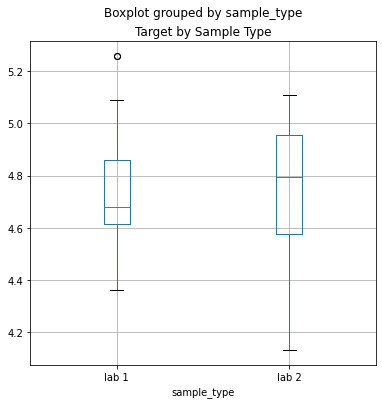

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
data.boxplot(column=["target"], by="sample_type", ax=ax)
ax.set_title("Target by Sample Type")

plt.show()

Visualisasi boxplot menunjukkan perbedaan kuantitatif antara kedua jenis sampel yang digunakan dalam proyek. Kita dapat melihat bahwa nilai rata-rata pada sampel 2 lebih tinggi daripada pada sampel 1. Selain itu, pada sampel 1 terdapat titik data yang menunjukkan adanya outlier, yang menandakan nilai yang ekstrim atau tidak biasa, sedangkan pada sampel 2 tidak ada outlier yang terlihat.

<ipython-input-91-185134ddd55c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('sample_type')['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'].mean().plot(kind= 'bar', subplots=True, figsize=(6, 16));


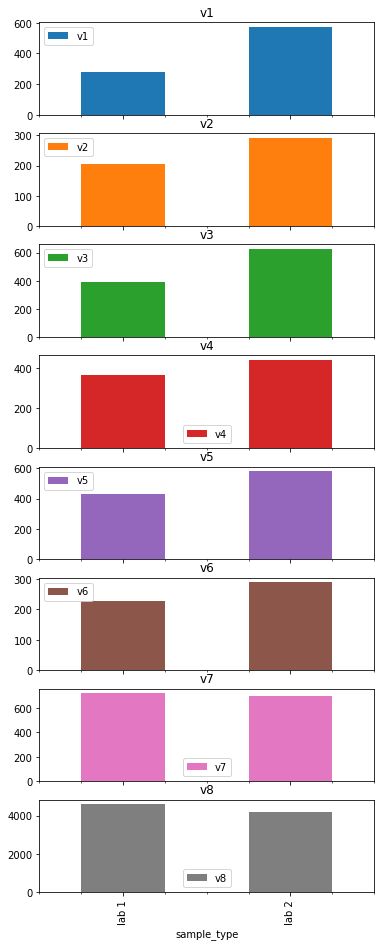

In [91]:
data.groupby('sample_type')['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'].mean().plot(kind= 'bar', subplots=True, figsize=(6, 16));

Berdasarkan visualisasi di atas, dapat kita lihat nilai rata-rata dari feature v1 hingga v8 pada setiap tipe sampel. Tipe sampel 2 memiliki dominasi rata-rata tertinggi dari semua feature, akan tetapi pada feature v7 dan v8 tipe sampel 1 lebih tinggi dibandingkan dengan tipe sampel 2.

## **IV. DATA PREPROCESSING**

### 4.1 SPLITTING THE DATA

#### 4.1.1 SAMPLE_TYPE:LAB 1

In [28]:
# separating inference data
inference_lab1 = lab1.sample(10, random_state=32)

# separating inferential data from dataframe
lab1 = lab1.drop(inference_lab1.index)

# reseting index
inference_lab1.reset_index(drop=True, inplace=True)

# reseting index
lab1.reset_index(drop=True, inplace=True)
lab1

,target,v1,v2,v6,v7,v8
0,4.63,260.600000,199.000000,273.133333,742.066667,4047.733333
1,5.00,263.200000,194.600000,220.066667,712.000000,4673.466667
2,4.91,247.266667,205.800000,222.133333,677.200000,4386.800000
3,4.77,257.944444,191.833333,195.944444,678.555556,4588.777778
4,4.89,258.200000,195.733333,196.000000,677.133333,4867.066667
...,...,...,...,...,...,...
85,4.64,342.875000,265.437500,279.187500,788.562500,4973.250000
86,4.60,305.250000,234.250000,252.375000,741.250000,4783.437500
87,4.84,331.466667,244.866667,257.733333,769.733333,4871.666667
88,4.89,316.687500,245.250000,291.437500,807.000000,4762.625000


In [29]:
# define feature and target
X_lab1 = lab1.drop('target', axis=1)
y_lab1 = lab1.target

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lab1, y_lab1, test_size=0.2, random_state=42)

for i in [X_train1, X_test1, y_train1, y_test1]:
    print(i.shape)

(72, 5)
(18, 5)
(72,)
(18,)


In [30]:
# for EDA model creation, use dataframe stored in data_eda_lab1
data_eda_lab1 = pd.concat([X_train1.reset_index(drop=True), y_train1.reset_index(drop=True)], axis=1)
data_eda_lab1

,v1,v2,v6,v7,v8,target
0,302.600000,237.200000,319.333333,853.466667,4111.733333,4.82
1,298.125000,189.312500,219.000000,694.375000,4801.187500,4.68
2,273.625000,190.812500,229.937500,747.812500,4609.062500,4.77
3,250.187500,197.000000,219.750000,728.250000,4747.312500,4.63
4,274.533333,187.133333,235.800000,775.266667,4703.000000,4.53
...,...,...,...,...,...,...
67,248.937500,182.187500,199.562500,620.875000,4658.937500,5.09
68,298.437500,201.562500,239.750000,801.562500,4495.437500,4.48
69,297.125000,200.687500,222.375000,711.750000,4592.625000,4.76
70,256.875000,189.312500,213.437500,696.437500,4599.812500,4.46


In [31]:
# Numerical Overview
data_eda_lab1.describe().T

,count,mean,std,min,25%,50%,75%,max
v1,72.0,278.612748,26.770392,227.285714,263.800000,270.843750,285.772917,360.666667
v2,72.0,204.392733,21.284711,178.800000,190.903125,199.381250,206.318750,265.437500
v6,72.0,227.451356,23.621661,191.312500,213.959375,222.254167,236.316667,319.333333
v7,72.0,723.391297,48.055195,620.875000,689.718750,727.335417,753.950000,853.466667
v8,72.0,4613.852070,209.247760,3961.625000,4523.083333,4633.077083,4753.399554,5086.375000
target,72.0,4.712917,0.187064,4.360000,4.615000,4.670000,4.842500,5.260000


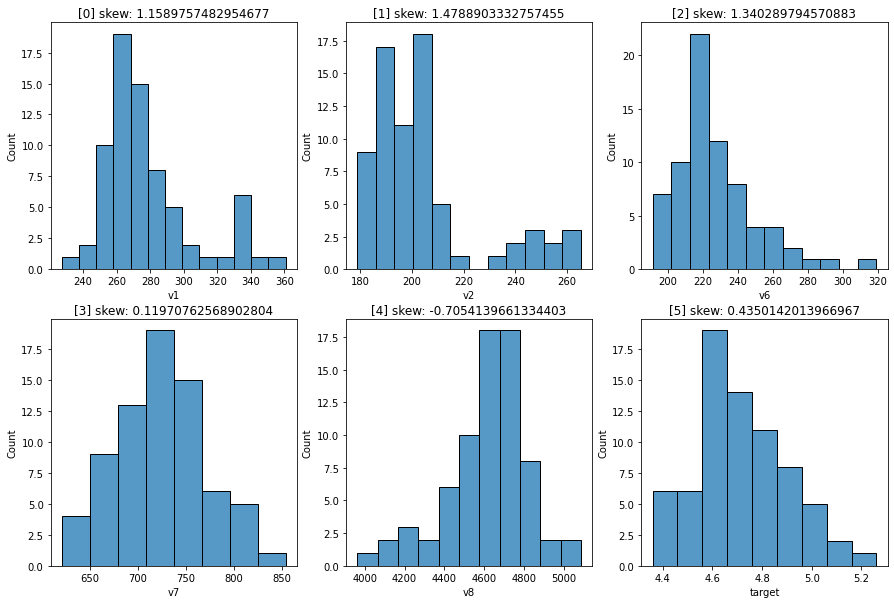

In [32]:
fig, ax = plt.subplots(ncols=3,nrows=2, figsize=[15,10])
ax = ax.flatten()

for idx, col in enumerate(data_eda_lab1):
    sns.histplot(data_eda_lab1[col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_eda_lab1[col].skew()}')

In [33]:
def outlier_analysis(data_eda_lab1,col):
  skewness = data_eda_lab1[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_eda_lab1[col].mean() + 3*data_eda_lab1[col].std()
    lower = data_eda_lab1[col].mean() - 3*data_eda_lab1[col].std()
  else:
    Q1 = data_eda_lab1[col].quantile(0.25)
    Q3 = data_eda_lab1[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = data_eda_lab1[(data_eda_lab1[col]>=lower) & (data_eda_lab1[col]<=upper)]
  outliers = data_eda_lab1[(data_eda_lab1[col]<lower) | (data_eda_lab1[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda_lab1.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_eda_lab1.columns):
  outlier_analysis(data_eda_lab1,i)

percentage outlier from v1 : 1.3888888888888888 %
percentage outlier from v2 : 0.0 %
percentage outlier from v6 : 1.3888888888888888 %
percentage outlier from v7 : 0.0 %
percentage outlier from v8 : 1.3888888888888888 %
percentage outlier from target : 0.0 %


In [34]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, missing_values='ignore', variables=['v1', 'v6', 'v8'])

lab1_cleaned = wins.fit_transform(data_eda_lab1)

In [35]:
# Compare before and after outlier handling
print('before handling: \n', data_eda_lab1.describe())

print('after handling: \n', lab1_cleaned.describe())

before handling: 
                v1          v2          v6          v7           v8     target
count   72.000000   72.000000   72.000000   72.000000    72.000000  72.000000
mean   278.612748  204.392733  227.451356  723.391297  4613.852070   4.712917
std     26.770392   21.284711   23.621661   48.055195   209.247760   0.187064
min    227.285714  178.800000  191.312500  620.875000  3961.625000   4.360000
25%    263.800000  190.903125  213.959375  689.718750  4523.083333   4.615000
50%    270.843750  199.381250  222.254167  727.335417  4633.077083   4.670000
75%    285.772917  206.318750  236.316667  753.950000  4753.399554   4.842500
max    360.666667  265.437500  319.333333  853.466667  5086.375000   5.260000
after handling: 
                v1          v2          v6          v7           v8     target
count   72.000000   72.000000   72.000000   72.000000    72.000000  72.000000
mean   276.462545  204.392733  226.227413  723.391297  4618.250246   4.712917
std     21.845939   21.2847

**SELECTION FEATURES NUMERIC**

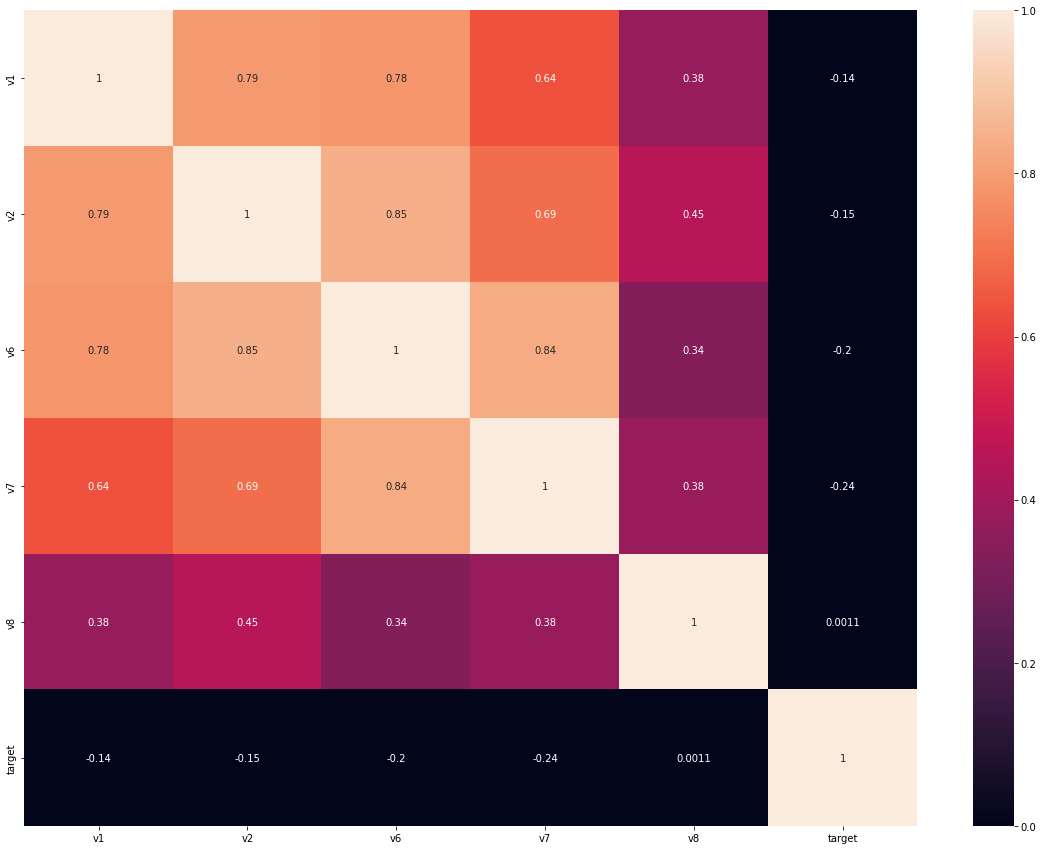

In [36]:
fig,ax = plt.subplots(figsize=[20,15])

corr = lab1_cleaned.corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

**SCALING FEATURES NUMERIC**

In [37]:
norm = 0
nonorm = 0
for col in lab1_cleaned[['v1', 'v2', 'v6', 'v7', 'v8']]:
  if lab1_cleaned[col].skew() >=-0.5 and lab1_cleaned[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [38]:
# numerical scaling
num_col_scalling = ['v1', 'v2', 'v6', 'v7', 'v8']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(lab1_cleaned[num_col_scalling]))
num_scaled.columns = num_col_scalling

lab1_cleaned.drop(num_col_scalling, axis=1, inplace=True)
lab1_cleaned = pd.concat([lab1_cleaned.reset_index(drop=True), num_scaled], axis=1)

lab1_cleaned_num = lab1_cleaned[['v1', 'v2', 'v6', 'v7', 'v8', 'target']]
lab1_cleaned_num.head()

,v1,v2,v6,v7,v8,target
0,0.816453,0.674073,1.000000,1.000000,0.000000,4.82
1,0.765538,0.121339,0.352527,0.316004,0.686182,4.68
2,0.486785,0.138652,0.491787,0.545753,0.474769,4.77
3,0.220122,0.210071,0.362076,0.461646,0.626898,4.63
4,0.497120,0.096186,0.566430,0.663788,0.578137,4.53


#### 4.1.2 SAMPLE_TYPE:LAB 2

In [39]:
# separating inference data
inference_lab2 = lab2.sample(10, random_state=32)

# separating inferential data from dataframe
lab2 = lab2.drop(inference_lab2.index)

# reseting index
inference_lab2.reset_index(drop=True, inplace=True)

# reseting index
lab2.reset_index(drop=True, inplace=True)
lab2

,target,v1,v2,v6,v7,v8
0,4.790000,526.466667,192.866667,218.400000,658.066667,4377.333333
1,4.930000,504.357143,211.285714,214.857143,806.857143,4836.571429
2,5.030000,529.437500,210.875000,218.562500,596.062500,4458.500000
3,4.720000,541.875000,209.500000,216.875000,638.750000,4467.875000
4,4.770000,537.533333,207.733333,218.333333,646.333333,4274.333333
...,...,...,...,...,...,...
85,4.844222,513.595480,207.930196,213.592333,642.750704,4704.390473
86,4.833510,528.359635,202.737196,212.264579,630.752159,4250.114769
87,4.218976,619.318509,353.810957,358.614780,741.004126,3792.668436
88,5.033977,523.898038,209.434701,217.456439,606.285223,4450.582933


In [40]:
# define feature and target
X_lab2 = lab2.drop('target', axis=1)
y_lab2 = lab2.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lab2, y_lab2, test_size=0.2, random_state=42)

for i in [X_train2, X_test2, y_train2, y_test2]:
    print(i.shape)

(72, 5)
(18, 5)
(72,)
(18,)


In [41]:
# for EDA model creation, use dataframe stored in data_eda_lab2
data_eda_lab2 = pd.concat([X_train2.reset_index(drop=True), y_train2.reset_index(drop=True)], axis=1)
data_eda_lab2

,v1,v2,v6,v7,v8,target
0,624.200000,377.666667,364.400000,734.200000,3741.266667,4.790000
1,598.379545,373.573665,360.611023,699.726970,3858.750729,4.734414
2,529.484857,196.921223,218.381818,654.866658,4349.242349,4.784545
3,600.505836,370.048949,357.718354,743.552423,3887.591387,4.636377
4,500.310043,201.119893,206.695212,646.672269,4546.861256,4.932718
...,...,...,...,...,...,...
67,499.466667,201.066667,207.066667,646.333333,4544.666667,4.930000
68,531.381221,203.968724,204.386983,645.644605,4577.503478,4.786705
69,577.448471,356.483500,344.408065,693.913317,3933.388897,4.818145
70,552.875000,211.812500,201.687500,651.000000,4428.312500,4.980000


In [42]:
# Numerical Overview
data_eda_lab2.describe().T

,count,mean,std,min,25%,50%,75%,max
v1,72.0,570.828826,53.930540,495.333333,523.220404,562.414583,617.529627,678.375000
v2,72.0,289.404535,85.705399,182.933333,204.169570,284.081250,372.093416,422.812500
v6,72.0,286.611528,76.378692,189.200000,209.555655,291.531250,358.726710,415.375000
v7,72.0,693.837528,52.288047,586.266667,646.587535,694.925409,733.512627,806.857143
v8,72.0,4212.718569,379.065660,3725.666667,3858.984557,4101.054096,4577.969675,4836.571429
target,72.0,4.749712,0.238289,4.130000,4.624227,4.800000,4.930000,5.110000


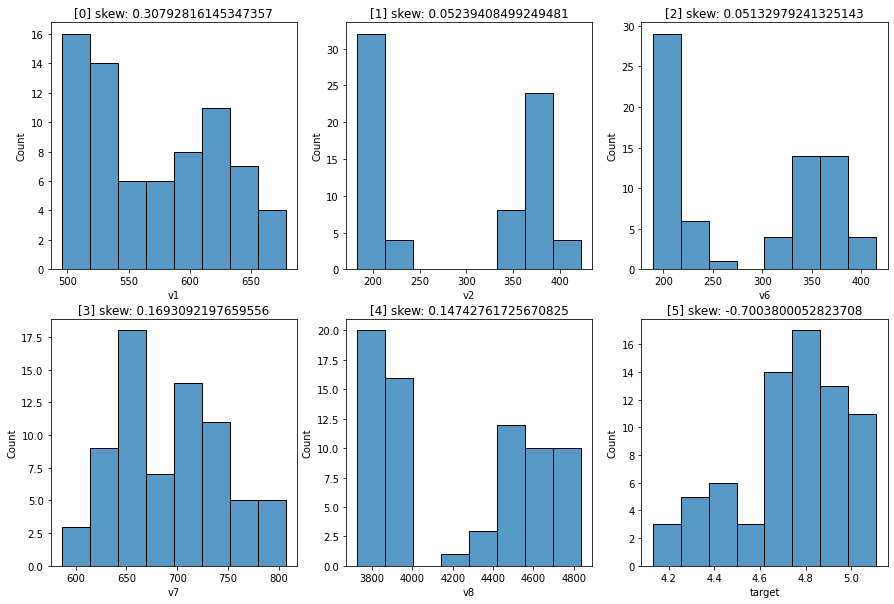

In [43]:
fig, ax = plt.subplots(ncols=3,nrows=2, figsize=[15,10])
ax = ax.flatten()

for idx, col in enumerate(data_eda_lab2):
    sns.histplot(data_eda_lab2[col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_eda_lab2[col].skew()}')

In [44]:
def outlier_analysis(data_eda_lab2,col):
  skewness = data_eda_lab2[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_eda_lab2[col].mean() + 3*data_eda_lab2[col].std()
    lower = data_eda_lab2[col].mean() - 3*data_eda_lab2[col].std()
  else:
    Q1 = data_eda_lab2[col].quantile(0.25)
    Q3 = data_eda_lab2[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (1.5*IQR)
    lower = Q3 - (1.5*IQR)
  
  no_outliers = data_eda_lab2[(data_eda_lab2[col]>=lower) & (data_eda_lab2[col]<=upper)]
  outliers = data_eda_lab2[(data_eda_lab2[col]<lower) | (data_eda_lab2[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda_lab2.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_eda_lab2.columns):
  outlier_analysis(data_eda_lab2,i)

percentage outlier from v1 : 0.0 %
percentage outlier from v2 : 0.0 %
percentage outlier from v6 : 0.0 %
percentage outlier from v7 : 0.0 %
percentage outlier from v8 : 0.0 %
percentage outlier from target : 0.0 %


**SELECTION FEATURES NUMERIC**

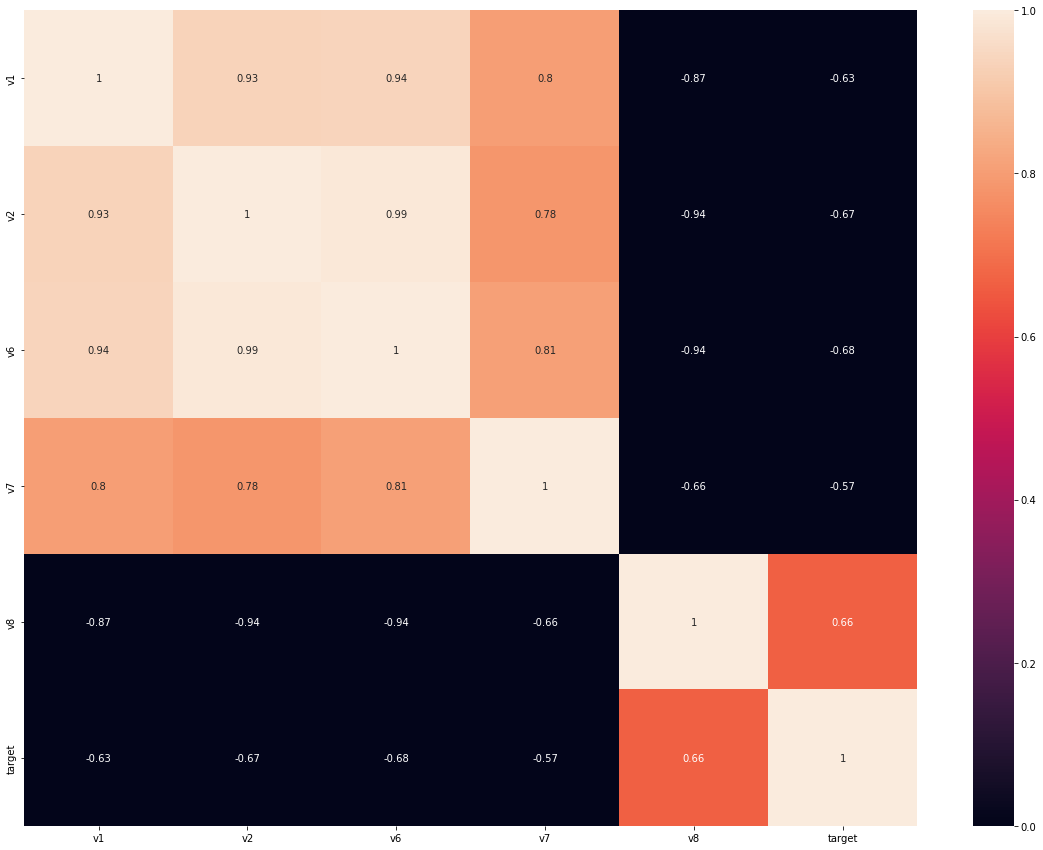

In [45]:
fig,ax = plt.subplots(figsize=[20,15])

corr = data_eda_lab2.corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

**SCALING FEATURES NUMERIC**

In [46]:
norm = 0
nonorm = 0
for col in data_eda_lab2[['v1', 'v2', 'v6', 'v7', 'v8']]:
  if data_eda_lab2[col].skew() >=-0.5 and data_eda_lab2[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

In [47]:
# numerical scaling
num_col_scalling = ['v1', 'v2', 'v6', 'v7', 'v8']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_eda_lab2[num_col_scalling]))
num_scaled.columns = num_col_scalling

data_eda_lab2.drop(num_col_scalling, axis=1, inplace=True)
data_eda_lab2 = pd.concat([data_eda_lab2.reset_index(drop=True), num_scaled], axis=1)

data_eda_lab2_num = data_eda_lab2[['v1', 'v2', 'v6', 'v7', 'v8', 'target']]
data_eda_lab2_num.head()

,v1,v2,v6,v7,v8,target
0,0.996573,1.037059,1.025605,0.777342,-1.252449,4.790000
1,0.514441,0.988967,0.975649,0.113425,-0.940343,4.734414
2,-0.771995,-1.086656,-0.899577,-0.750542,0.362686,4.784545
3,0.554144,0.947552,0.937511,0.957461,-0.863726,4.636377
4,-1.316761,-1.037323,-1.053660,-0.908358,0.887676,4.932718


### 4.2 PREPROCESS

#### 4.2.1 TESTING:LAB 1

In [48]:
testing_lab1 = pd.concat([X_test1.reset_index(drop=True), y_test1.reset_index(drop=True)], axis=1)
testing_lab1.head()

,v1,v2,v6,v7,v8,target
0,261.933333,199.800000,221.066667,716.200000,4567.800000,4.48
1,243.200000,196.666667,213.000000,719.200000,4689.333333,4.44
2,284.400000,201.466667,243.600000,715.266667,4653.333333,4.48
3,285.142857,193.928571,221.857143,748.642857,4613.714286,4.87
4,260.600000,199.000000,273.133333,742.066667,4047.733333,4.63


In [49]:
# capping outlier
testing_lab1 = wins.transform(testing_lab1)
testing_lab1.head()

,v1,v2,v6,v7,v8,target
0,261.933333,199.800000,221.066667,716.200000,4567.800000,4.48
1,243.200000,196.666667,213.000000,719.200000,4689.333333,4.44
2,284.400000,201.466667,243.600000,715.266667,4653.333333,4.48
3,285.142857,193.928571,221.857143,748.642857,4613.714286,4.87
4,260.600000,199.000000,269.852604,742.066667,4177.609003,4.63


In [50]:
# numerical scalling
num_col = ['v1', 'v2', 'v6', 'v7', 'v8']

testing_lab1[num_col] = scaler.transform(testing_lab1[num_col])
testing_lab1.head()

,v1,v2,v6,v7,v8,target
0,-5.767849,-1.052832,-0.864179,0.430680,0.943302,4.48
1,-6.117647,-1.089647,-0.970534,0.488457,1.266164,4.44
2,-5.348340,-1.033249,-0.567087,0.412705,1.170528,4.48
3,-5.334469,-1.121819,-0.853757,1.055498,1.065277,4.87
4,-5.792746,-1.062231,-0.220959,0.928847,-0.093271,4.63


In [51]:
X_train1 = lab1_cleaned_num.drop('target',axis=1).copy()
y_train1 = lab1_cleaned_num['target']

X_test1 = testing_lab1.drop('target',axis=1).copy()
y_test1 = testing_lab1['target']

In [52]:
X_train1

,v1,v2,v6,v7,v8
0,0.816453,0.674073,1.000000,1.000000,0.000000
1,0.765538,0.121339,0.352527,0.316004,0.686182
2,0.486785,0.138652,0.491787,0.545753,0.474769
3,0.220122,0.210071,0.362076,0.461646,0.626898
4,0.497120,0.096186,0.566430,0.663788,0.578137
...,...,...,...,...,...
67,0.205900,0.039100,0.105042,0.000000,0.529651
68,0.769093,0.262733,0.616723,0.776844,0.349736
69,0.754160,0.252633,0.395499,0.390706,0.456681
70,0.296210,0.121339,0.281703,0.324872,0.464590


In [53]:
X_test1

,v1,v2,v6,v7,v8
0,-5.767849,-1.052832,-0.864179,0.430680,0.943302
1,-6.117647,-1.089647,-0.970534,0.488457,1.266164
2,-5.348340,-1.033249,-0.567087,0.412705,1.170528
3,-5.334469,-1.121819,-0.853757,1.055498,1.065277
4,-5.792746,-1.062231,-0.220959,0.928847,-0.093271
5,-5.974336,-1.262712,-1.203735,-0.844269,0.019012
6,-5.618469,-0.983900,-0.597851,1.192054,1.293439
7,-5.305627,-1.223790,-0.977950,0.076554,0.581044
8,-5.675909,-1.178050,-1.185253,-0.534748,1.145164
9,-5.419996,-1.054888,-0.832920,1.232097,1.354440


#### 4.2.2 TESTING:LAB 2

In [54]:
testing_lab2 = pd.concat([X_test2.reset_index(drop=True), y_test2.reset_index(drop=True)], axis=1)
testing_lab2.head()

,v1,v2,v6,v7,v8,target
0,635.562500,332.812500,329.437500,721.562500,3947.125000,4.540000
1,551.631579,225.368421,237.684211,727.105263,4670.210526,5.010000
2,624.387337,377.646443,364.346779,733.964764,3741.221961,4.789042
3,677.104849,406.970202,395.645959,767.676181,3925.259733,4.475502
4,526.466667,192.866667,218.400000,658.066667,4377.333333,4.790000


In [55]:
# numerical scalling
num_col = ['v1', 'v2', 'v6', 'v7', 'v8']

testing_lab2[num_col] = scaler.transform(testing_lab2[num_col])
testing_lab2.head()

,v1,v2,v6,v7,v8,target
0,1.208739,0.510033,0.564641,0.533956,-0.705570,4.540000
1,-0.358460,-0.752409,-0.645084,0.640705,1.215363,5.010000
2,1.000071,1.036821,1.024903,0.772812,-1.252568,4.789042
3,1.984438,1.381368,1.437568,1.422062,-0.763657,4.475502
4,-0.828352,-1.134297,-0.899337,-0.688912,0.437312,4.790000


In [56]:
X_train2 = data_eda_lab2_num.drop('target',axis=1).copy()
y_train2 = data_eda_lab2_num['target']

X_test2 = testing_lab2.drop('target',axis=1).copy()
y_test2 = testing_lab2['target']

In [57]:
X_train2

,v1,v2,v6,v7,v8
0,0.996573,1.037059,1.025605,0.777342,-1.252449
1,0.514441,0.988967,0.975649,0.113425,-0.940343
2,-0.771995,-1.086656,-0.899577,-0.750542,0.362686
3,0.554144,0.947552,0.937511,0.957461,-0.863726
4,-1.316761,-1.037323,-1.053660,-0.908358,0.887676
...,...,...,...,...,...
67,-1.332509,-1.037949,-1.048762,-0.914885,0.881846
68,-0.736585,-1.003850,-1.084092,-0.928149,0.969080
69,0.123605,0.788162,0.762021,0.001460,-0.742061
70,-0.335243,-0.911688,-1.119684,-0.825010,0.572742


In [58]:
X_test2

,v1,v2,v6,v7,v8
0,1.208739,0.510033,0.564641,0.533956,-0.705570
1,-0.358460,-0.752409,-0.645084,0.640705,1.215363
2,1.000071,1.036821,1.024903,0.772812,-1.252568
3,1.984438,1.381368,1.437568,1.422062,-0.763657
4,-0.828352,-1.134297,-0.899337,-0.688912,0.437312
5,-0.581875,-0.627490,-0.200557,1.125289,1.121647
6,1.528116,1.422451,1.353460,1.229288,-0.874506
7,1.643057,1.505838,1.551337,1.012943,-0.945855
8,-1.648152,-1.152558,-1.204559,-1.059729,0.662402
9,0.502374,0.954810,0.934192,1.005883,-0.849535


## V. MODEL TRAINING

In [61]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import autosklearn.regression

#### 5.1.1 SAMPLE_TYPE:LAB 1

In [63]:
auto_regressor1 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=60,
)
auto_regressor1.fit(X_train1, y_train1)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=300)

In [64]:
print(auto_regressor1.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
87           1             0.38             adaboost  0.783948  0.836422
10           2             0.34        random_forest  0.831729  1.144117
106          3             0.10        random_forest  0.867475  1.021866
78           4             0.08  k_nearest_neighbors  1.073210  0.995070
11           5             0.10     gaussian_process  1.083233  0.788744


Hasil yang diberikan adalah output dari algoritma AutoML (Automated Machine Learning) yang mencoba untuk mengotomatiskan beberapa tahapan dalam proses Machine Learning, seperti pemilihan model, hyperparameter tuning, dan ensemble learning.

Output tersebut menunjukkan beberapa hal sebagai berikut:

*   model_id: nomor identifikasi untuk masing-masing model yang dihasilkan oleh AutoML.
*   rank: peringkat model berdasarkan performa terbaik pada dataset yang diberikan, dimana peringkat 1 merupakan peringkat terbaik.
*   ensemble_weight: bobot yang diberikan untuk masing-masing model dalam pembentukan ensemble model, dimana bobot tersebut menunjukkan seberapa pentingnya model dalam menghasilkan prediksi akhir.
*   type: jenis model Machine Learning yang digunakan, seperti Adaboost, Random Forest, k-Nearest Neighbors, dan Gaussian Process.
*   cost: performa model pada dataset yang diberikan, dimana nilai cost yang lebih rendah menunjukkan performa yang lebih baik.
*   duration: waktu yang diperlukan untuk melatih model pada dataset yang diberikan.

Dari output tersebut, dapat disimpulkan bahwa model dengan model_id 87 yang menggunakan metode Adaboost memiliki performa terbaik pada dataset yang diberikan, dengan bobot 0.38 dalam ensemble model. Sedangkan model dengan model_id 11 yang menggunakan metode Gaussian Process memiliki performa paling buruk pada dataset tersebut.

#### 5.1.2 SAMPLE_TYPE:LAB 2

In [65]:
auto_regressor2 = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,
    per_run_time_limit=60,
)
auto_regressor2.fit(X_train2, y_train2)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=300)

In [66]:
print(auto_regressor2.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
60           1             0.48  k_nearest_neighbors  0.471716  0.617112
69           2             0.26             adaboost  0.555528  1.029662
54           3             0.24  k_nearest_neighbors  0.555993  0.643685
76           4             0.02  k_nearest_neighbors  0.571455  0.756609


Dari output tersebut, dapat disimpulkan bahwa model dengan model_id 60 yang menggunakan metode k-Nearest Neighbors memiliki performa terbaik pada dataset tipe sampel 2 yang diberikan, dengan bobot 0.48 dalam ensemble model. Sedangkan model dengan model_id 76 yang menggunakan metode k-Nearest Neighbors juga, memiliki performa paling buruk pada dataset tersebut. Model dengan model_id 69 menggunakan metode Adaboost menempati peringkat kedua dengan performa yang baik.

## VI. MODEL EVALUATION


#### 6.1.1 SAMPLE_TYPE:LAB 1

In [67]:
train_predict1 = auto_regressor1.predict(X_train1)
test_predict1 = auto_regressor1.predict(X_test1)

print('------- TRAIN EVALUATION -------')
print('MAE :', mae(y_train1, train_predict1))
print('RMSE:', np.sqrt(mse(y_train1, train_predict1)))
print(' ')
print('------- TEST EVALUATION -------')
print('MAE :', mae(y_test1, test_predict1))
print('RMSE:', np.sqrt(mse(y_test1, test_predict1)))

------- TRAIN EVALUATION -------
MAE : 0.08947335456808402
RMSE: 0.1165881056169358
 
------- TEST EVALUATION -------
MAE : 0.16236726575427582
RMSE: 0.1981753118515304


Hasil yang diberikan adalah output dari evaluasi model Machine Learning pada dataset training dan testing menggunakan metrik MAE (Mean Absolute Error) dan RMSE (Root Mean Squared Error).

Output tersebut menunjukkan beberapa hal sebagai berikut:
*   MAE (Mean Absolute Error): rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya pada dataset yang diberikan, dimana nilai yang lebih rendah menunjukkan performa yang lebih baik.
*   RMSE (Root Mean Squared Error): akar dari rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya pada dataset yang diberikan, dimana nilai yang lebih rendah menunjukkan performa yang lebih baik.

Dari output tersebut, dapat disimpulkan bahwa model memiliki performa yang lebih baik pada dataset training dengan MAE sebesar 0.089 dan RMSE sebesar 0.116, dibandingkan dengan performa model pada dataset testing dengan MAE sebesar 0.162 dan RMSE sebesar 0.198. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, di mana model bekerja sangat baik pada data yang digunakan untuk melatih model, namun performanya menurun ketika diterapkan pada data yang belum pernah dilihat sebelumnya.

#### 6.1.2 SAMPLE_TYPE:LAB 2

In [68]:
train_predict2 = auto_regressor2.predict(X_train2)
test_predict2 = auto_regressor2.predict(X_test2)

print('------- TRAIN EVALUATION -------')
print('MAE :', mae(y_train2, train_predict2))
print('RMSE:', np.sqrt(mse(y_train2, train_predict2)))
print(' ')
print('------- TEST EVALUATION -------')
print('MAE :', mae(y_test2, test_predict2))
print('RMSE:', np.sqrt(mse(y_test2, test_predict2)))

------- TRAIN EVALUATION -------
MAE : 0.06472352641961887
RMSE: 0.0988239018464419
 
------- TEST EVALUATION -------
MAE : 0.08748086957119147
RMSE: 0.11730385419880993


Dari output tersebut, dapat disimpulkan bahwa model memiliki performa yang lebih baik pada dataset testing dengan MAE sebesar 0.087 dan RMSE sebesar 0.117, dibandingkan dengan performa model pada dataset training dengan MAE sebesar 0.064 dan RMSE sebesar 0.098. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, sama halnya dengan hasil dari sampel lab1. Oleh karena itu, perlu dilakukan evaluasi lebih lanjut pada model untuk mengatasi overfitting, seperti melakukan regularisasi, peningkatan jumlah data training, atau pengurangan fitur yang tidak penting. 

## VII. MODEL INFERENCE

#### 7.1.1 SAMPLE_TYPE:LAB 1

In [71]:
inference_lab1 = inference_lab1[['v1', 'v2', 'v6', 'v7', 'v8', 'target']]
inference_lab1

,v1,v2,v6,v7,v8,target
0,273.333333,181.400000,214.600000,726.200000,4524.200000,4.86
1,282.733333,217.466667,232.933333,778.000000,4485.266667,4.86
2,332.500000,254.437500,264.125000,745.312500,4747.750000,4.63
3,326.133333,243.933333,251.800000,771.866667,4859.466667,4.96
4,272.333333,205.000000,222.333333,711.333333,4701.466667,4.59
5,286.000000,216.750000,244.312500,810.625000,4834.187500,4.91
6,290.733333,211.400000,236.333333,725.000000,4557.866667,4.45
7,280.866667,197.400000,212.333333,716.266667,4624.000000,4.66
8,280.812500,187.187500,220.437500,669.500000,4406.687500,4.86
9,341.500000,263.562500,292.437500,790.562500,4871.000000,4.71


In [72]:
# capping outlier
inf1 = wins.transform(inference_lab1)
inf1.head()

,v1,v2,v6,v7,v8,target
0,273.333333,181.400000,214.600000,726.200000,4524.200000,4.86
1,282.733333,217.466667,232.933333,778.000000,4485.266667,4.86
2,318.732292,254.437500,264.125000,745.312500,4747.750000,4.63
3,318.732292,243.933333,251.800000,771.866667,4859.466667,4.96
4,272.333333,205.000000,222.333333,711.333333,4701.466667,4.59


In [73]:
# numerical scalling
num_col = ['v1', 'v2', 'v6', 'v7', 'v8']

inf1[num_col] = scaler.transform(inf1[num_col])
inf1.head()

,v1,v2,v6,v7,v8,target
0,-5.554982,-1.269027,-0.949439,0.623270,0.827475,4.86
1,-5.379461,-0.845252,-0.707722,1.620888,0.724045,4.86
2,-4.707271,-0.410854,-0.296474,0.991359,1.421353,4.63
3,-4.707271,-0.534276,-0.458974,1.502766,1.718137,4.96
4,-5.573655,-0.991733,-0.847478,0.336952,1.298398,4.59


In [74]:
X_inf1 = inf1.drop('target',axis=1).copy()

In [76]:
y_pred_inf1 = auto_regressor1.predict(X_inf1)
y_pred_inf1_df = pd.DataFrame(y_pred_inf1, columns=['Target Prediction'])
y_pred_inf1_df

,Target Prediction
0,4.715377
1,4.715377
2,4.715358
3,4.715377
4,4.715656
5,4.715377
6,4.715377
7,4.715656
8,4.726415
9,4.715809


In [77]:
# Joining inference data with predictions
pd.concat([inf1,y_pred_inf1_df], axis=1)

,v1,v2,v6,v7,v8,target,Target Prediction
0,-5.554982,-1.269027,-0.949439,0.623270,0.827475,4.86,4.715377
1,-5.379461,-0.845252,-0.707722,1.620888,0.724045,4.86,4.715377
2,-4.707271,-0.410854,-0.296474,0.991359,1.421353,4.63,4.715358
3,-4.707271,-0.534276,-0.458974,1.502766,1.718137,4.96,4.715377
4,-5.573655,-0.991733,-0.847478,0.336952,1.298398,4.59,4.715656
5,-5.318464,-0.853673,-0.557693,2.249215,1.650981,4.91,4.715377
6,-5.230081,-0.916534,-0.662895,0.600159,0.916913,4.45,4.715377
7,-5.414316,-1.081031,-0.979324,0.431964,1.092601,4.66,4.715656
8,-5.415328,-1.201025,-0.872474,-0.468717,0.515294,4.86,4.726415
9,-4.707271,-0.303638,-0.220959,1.862830,1.748776,4.71,4.715809


#### 7.1.2 SAMPLE_TYPE:LAB 2

In [78]:
inference_lab2 = inference_lab2[['v1', 'v2', 'v6', 'v7', 'v8', 'target']]
inference_lab2

,v1,v2,v6,v7,v8,target
0,534.333333,226.733333,230.866667,690.200000,4508.000000,4.900000
1,672.500000,412.312500,396.125000,771.250000,3868.125000,4.580000
2,623.624041,369.189893,350.650842,709.475497,3907.087286,4.510643
3,516.006349,189.623157,192.858042,633.280768,4710.273645,4.922394
4,573.250000,361.250000,355.250000,712.312500,3943.687500,4.830000
5,620.875000,367.000000,364.062500,752.187500,3772.875000,4.140000
6,581.042259,349.539892,333.838538,683.051218,3912.958188,4.679180
7,515.866667,195.933333,204.000000,609.533333,4217.133333,4.920000
8,517.750000,216.750000,231.187500,677.875000,4701.250000,5.030000
9,622.067319,364.733621,360.252034,731.167289,3765.254433,4.657930


In [79]:
# numerical scalling
num_col = ['v1', 'v2', 'v6', 'v7', 'v8']

inference_lab2[num_col] = scaler.transform(inference_lab2[num_col])
inference_lab2.head()

,v1,v2,v6,v7,v8,target
0,-0.681462,-0.736371,-0.734970,-0.070055,0.784438,4.900000
1,1.898454,1.444139,1.443884,1.490890,-0.915440,4.580000
2,0.985818,0.937459,0.844329,0.301172,-0.811933,4.510643
3,-1.023672,-1.172407,-1.236096,-1.166265,1.321794,4.922394
4,0.045209,0.844167,0.904966,0.355810,-0.714702,4.830000


In [80]:
X_inf2 = inference_lab2.drop('target',axis=1).copy()

In [83]:
y_pred_inf2 = auto_regressor2.predict(X_inf2)
y_pred_inf2_df = pd.DataFrame(y_pred_inf2, columns=['Target Prediction'])
y_pred_inf2_df

,Target Prediction
0,4.879363
1,4.597766
2,4.536429
3,4.905653
4,4.746549
5,4.728786
6,4.750137
7,4.879614
8,4.892412
9,4.728786


In [84]:
# Joining inference data with predictions
pd.concat([inference_lab2,y_pred_inf2_df], axis=1)

,v1,v2,v6,v7,v8,target,Target Prediction
0,-0.681462,-0.736371,-0.734970,-0.070055,0.784438,4.900000,4.879363
1,1.898454,1.444139,1.443884,1.490890,-0.915440,4.580000,4.597766
2,0.985818,0.937459,0.844329,0.301172,-0.811933,4.510643,4.536429
3,-1.023672,-1.172407,-1.236096,-1.166265,1.321794,4.922394,4.905653
4,0.045209,0.844167,0.904966,0.355810,-0.714702,4.830000,4.746549
5,0.934487,0.911728,1.021155,1.123764,-1.168479,4.140000,4.728786
6,0.190710,0.706576,0.622666,-0.207734,-0.796337,4.679180,4.750137
7,-1.026281,-1.098264,-1.089195,-1.623618,0.011728,4.920000,4.879614
8,-0.991114,-0.853673,-0.730740,-0.307423,1.297822,5.030000,4.892412
9,0.956750,0.885098,0.970916,0.718935,-1.188724,4.657930,4.728786


## VII. KESIMPULAN:

Berdasarkan hasil statistika antar kedua tipe sampel, tidak ditemukan perbedaan yang signifikan terhadap kualitas pertumbuhan dan nutrisi tanaman. Namun, hasil evaluasi model menunjukkan bahwa model pada sampel 2 memiliki performa yang lebih baik dibandingkan dengan sampel 1. Hal ini dapat disebabkan oleh kualitas data pada sampel 2 yang lebih baik atau lebih sesuai dengan tujuan dari proyek.

Dalam proyek ini, teknologi cerdas dan machine learning digunakan untuk meningkatkan efisiensi dalam pertumbuhan dan nutrisi tanaman. Diharapkan bahwa proyek ini dapat memberikan manfaat bagi para petani untuk meningkatkan produksi pertanian mereka dan juga bagi lingkungan dengan mengurangi penggunaan pupuk yang tidak perlu. Meskipun tidak ditemukan perbedaan yang signifikan antara kedua sampel dalam hal kualitas pertumbuhan dan nutrisi tanaman, model yang dibangun pada proyek ini dapat menjadi dasar untuk pengembangan teknologi cerdas dalam bidang pertanian di masa depan.